<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%B3%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/winemag_dataset.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Unnamed:** Тут просто повторяется нумерация, так что мы потом снесем эту колонку, она нам не дает никакой информации

**country:** Страна, из которой произведено вино

**description:** Описание(запах, вкус)

**designation:**	Виноградник на территории винодельни, откуда взят виноград, из которого изготовлено вино

**points:**	Количество баллов, на которые винный энтузиаст оценил вино

**price:**	Стоимость бутылки вина

**province:**	Провинция или штат, из которого произведено вино

**region_1:**	Винодельческий район в провинции или штате (например, Напа)

**region_2:**	Иногда в пределах винодельческого района указываются более конкретные регионы (например, Резерфорд в долине Напа), но иногда это значение может быть пустым

**taster_name:** Название вина

**taster_twitter_handle:** Аккаунт в твитере

**title:** Название обзора вина, в котором часто указывается год сбора винограда, если вы заинтересованы в извлечении этой характеристики

**variety:** Сорт винограда, используемый для приготовления вина (например, Пино Нуар)

**winery:** Винодельня, на которой производилось вино

In [5]:
df = df.drop(columns = ['Unnamed: 0','description','designation','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,15.0,Douro
2,US,87,14.0,Oregon
3,US,87,13.0,Michigan
4,US,87,65.0,Oregon
...,...,...,...,...
129966,Germany,90,28.0,Mosel
129967,US,90,75.0,Oregon
129968,France,90,30.0,Alsace
129969,France,90,32.0,Alsace


In [6]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
df['price'] = df['price'].apply(lambda x: 'Вери дешево' if x<=10.0 else 'Норм пойло' if x>10.0 and x<35.0 else 'Вери гуд бухлишко' if x>=35.0 else x)

In [8]:
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
129966,Germany,90,Норм пойло,Mosel
129967,US,90,Вери гуд бухлишко,Oregon
129968,France,90,Норм пойло,Alsace
129969,France,90,Норм пойло,Alsace


In [9]:
df['price'] = df['price']. fillna ('Норм пойло')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   country   129908 non-null  object
 1   points    129971 non-null  int64 
 2   price     129971 non-null  object
 3   province  129908 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB


In [11]:
df = df.dropna()
df
#Удалям наны

,country,points,price,province
0,Italy,87,Норм пойло,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
129966,Germany,90,Норм пойло,Mosel
129967,US,90,Вери гуд бухлишко,Oregon
129968,France,90,Норм пойло,Alsace
129969,France,90,Норм пойло,Alsace


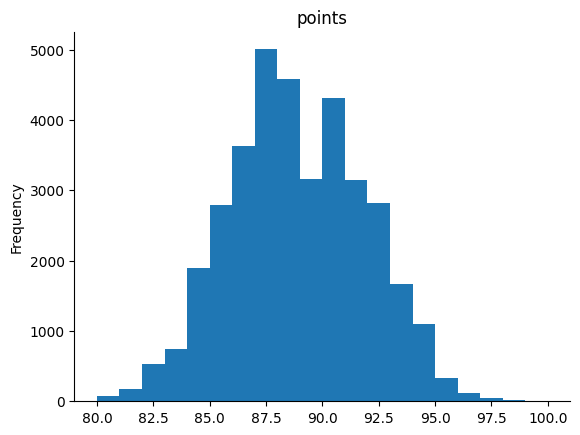

In [ ]:
# @title points

from matplotlib import pyplot as plt
df['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

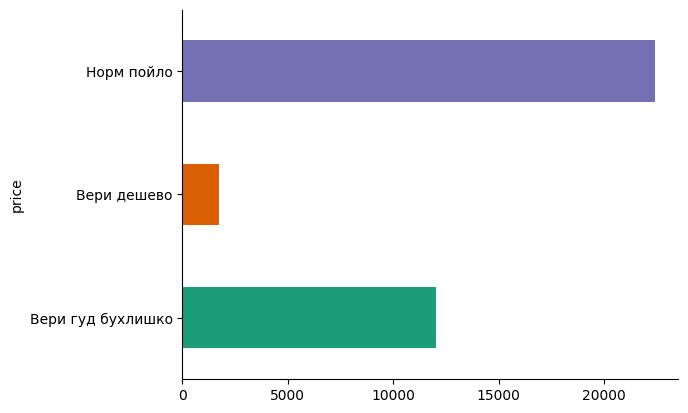

In [ ]:
# @title price

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36153 entries, 0 to 36168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   36153 non-null  object
 1   points    36153 non-null  int64 
 2   price     36153 non-null  object
 3   province  36153 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [12]:
X=df.drop(columns=['price'])
Y = df['price']
X

,country,points,province
0,Italy,87,Sicily & Sardinia
1,Portugal,87,Douro
2,US,87,Oregon
3,US,87,Michigan
4,US,87,Oregon
...,...,...,...
129966,Germany,90,Mosel
129967,US,90,Oregon
129968,France,90,Alsace
129969,France,90,Alsace


**2.**


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
#Делаем стандартизацию и лэйбл(он для статсмоделей)
scaler = MinMaxScaler()
le = LabelEncoder()
X[['points']] = scaler.fit_transform(X[['points']])
X['country'] = le.fit_transform(X['country'])
X['province'] = le.fit_transform(X['province'])
Y=le.fit_transform(Y)

In [15]:
#Выводим коэф параметров регрессии

X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 1.028e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:12:49   Log-Likelihood:            -1.6164e+05
No. Observations:              129908   AIC:                         3.233e+05
Df Residuals:                  129904   BIC:                         3.233e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5598      0.009    276.725      0.000       2.542       2.578
country       -0.0095      0.000    -52.850      0.000      -0.010      -0.009
points        -2.5278      0.015   -164.899      0.000      -2.558      -2.498
province       0.0003    1.7e-05     17.185      0.000       0.000       0.000
==============================================================================
Omnibus:                    80006.631   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10377.164
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       1.848   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все значимы так как p-value везде меньше 0.05

**3.**



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
clf_final = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

**4.**

In [18]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

In [19]:
X=df.drop(columns=['price'])
Y = df['price']
Y=le.fit_transform(Y)
X[['points']] = scaler.fit_transform(X[['points']])
X=pd.get_dummies (X, columns=['country','province'])

In [20]:
X

,points,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,...,province_Wellington,province_Western Australia,province_Western Cape,province_Wiener Gemischter Satz,province_Württemberg,province_Zenata,province_Österreichischer Perlwein,province_Österreichischer Sekt,province_Štajerska,province_Župa
0,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129967,0.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129968,0.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129969,0.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Делим на тест и трэин для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**5.**

In [23]:
#Обучаем
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [25]:
#Точность
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_lr,ac_rfc,ac_knn


(0.7316603802632592, 0.7356631514125164, 0.7000230929104765)

In [26]:
#Выводим сразу отчет классификации, чтобы сравнить рекол и зкуцишион
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.60      0.64     13127
           1       0.58      0.14      0.23      1864
           2       0.75      0.85      0.80     23982

    accuracy                           0.73     38973
   macro avg       0.67      0.53      0.56     38973
weighted avg       0.72      0.73      0.72     38973



In [27]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.59      0.65     13127
           1       0.56      0.16      0.25      1864
           2       0.75      0.86      0.80     23982

    accuracy                           0.74     38973
   macro avg       0.67      0.54      0.57     38973
weighted avg       0.73      0.74      0.72     38973



In [28]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63     13127
           1       0.46      0.20      0.28      1864
           2       0.75      0.77      0.76     23982

    accuracy                           0.70     38973
   macro avg       0.61      0.54      0.56     38973
weighted avg       0.69      0.70      0.69     38973



Логистическая модель лучшая

**6.**

In [30]:
cf_matrix = confusion_matrix(y_test,y_pred_lr)

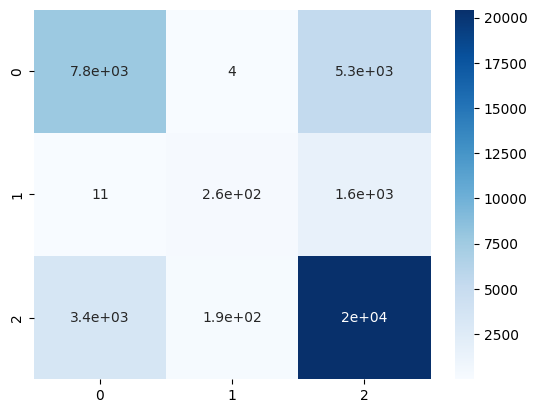

In [31]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [32]:
cf_matrix

array([[ 7815,     4,  5308],
       [   11,   265,  1588],
       [ 3357,   190, 20435]])

**7.**

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_cla = DecisionTreeClassifier(max_depth = 5)
tree_cla= tree_cla.fit(X_train,y_train)
y_pred_tree=tree_cla.predict(X_test)

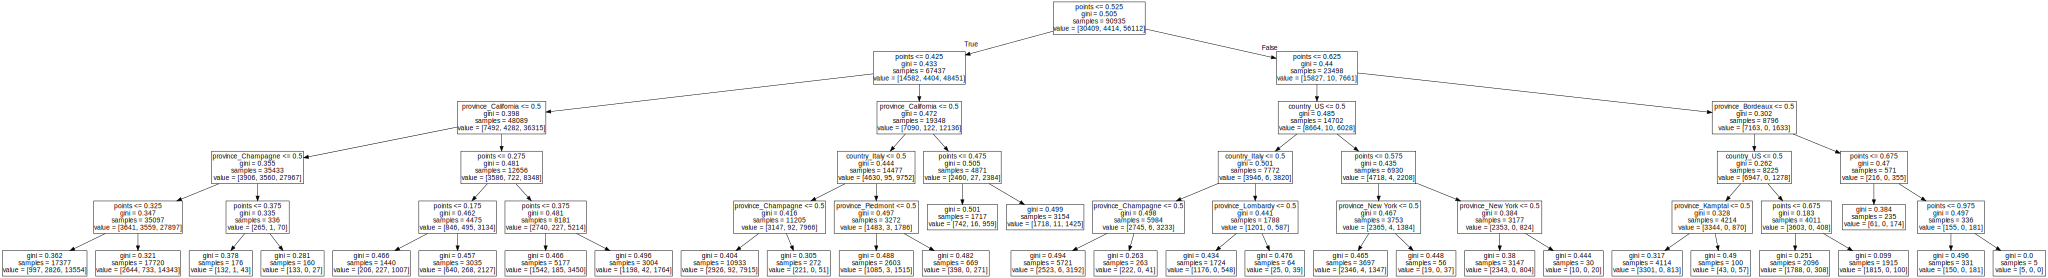

In [34]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree_cla, out_file=None, feature_names=X.columns))

Если поинт больше чем 0.525 то идет вправо, если между 0.525 и 0.575 то вниз

**Доп баллы**

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

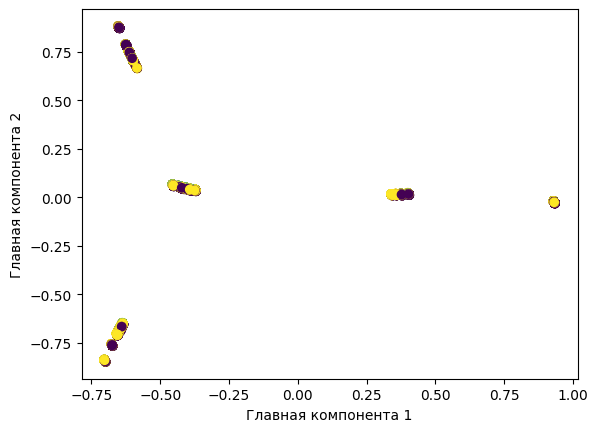

In [36]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

**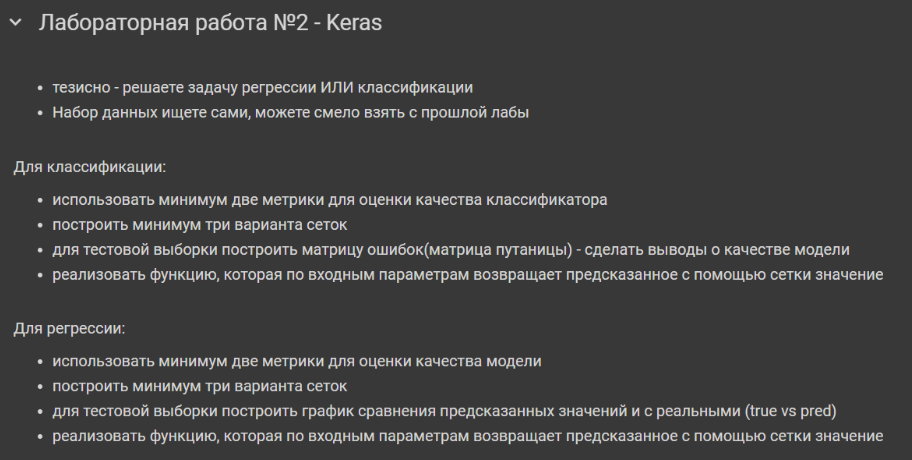**

In [37]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [38]:
y = to_categorical(Y) #превращаем в кучу столбцов

In [39]:
#разделение выборок
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [40]:
#создание модели с помощью Sequential
model = keras.models.Sequential()

#добавляем слои в модель
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

#компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])

#обучение модели
history=model.fit(X_train, y_train, epochs =5,batch_size=5)

Epoch 1/5
16628/16628 [==============================] - 101s 6ms/step - loss: 0.6217 - accuracy: 0.7174 - f1_score: 0.5108
Epoch 2/5
16628/16628 [==============================] - 103s 6ms/step - loss: 0.6007 - accuracy: 0.7288 - f1_score: 0.5423
Epoch 3/5
16628/16628 [==============================] - 99s 6ms/step - loss: 0.5969 - accuracy: 0.7303 - f1_score: 0.5490
Epoch 4/5
16628/16628 [==============================] - 99s 6ms/step - loss: 0.5941 - accuracy: 0.7314 - f1_score: 0.5459
Epoch 5/5
16628/16628 [==============================] - 117s 7ms/step - loss: 0.5924 - accuracy: 0.7318 - f1_score: 0.5476


In [41]:
model1 = keras.models.Sequential()
model1.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(y.shape[1], activation='softmax'))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model1.fit(X_train, y_train, epochs =10,batch_size=16)

Epoch 1/10
5197/5197 [==============================] - 24s 4ms/step - loss: 0.6172 - accuracy: 0.7198 - f1_score: 0.5302
Epoch 2/10
5197/5197 [==============================] - 24s 5ms/step - loss: 0.5960 - accuracy: 0.7295 - f1_score: 0.5544
Epoch 3/10
5197/5197 [==============================] - 25s 5ms/step - loss: 0.5921 - accuracy: 0.7310 - f1_score: 0.5538
Epoch 4/10
5197/5197 [==============================] - 27s 5ms/step - loss: 0.5897 - accuracy: 0.7320 - f1_score: 0.5596
Epoch 5/10
5197/5197 [==============================] - 25s 5ms/step - loss: 0.5879 - accuracy: 0.7330 - f1_score: 0.5621
Epoch 6/10
5197/5197 [==============================] - 25s 5ms/step - loss: 0.5870 - accuracy: 0.7334 - f1_score: 0.5577
Epoch 7/10
5197/5197 [==============================] - 25s 5ms/step - loss: 0.5860 - accuracy: 0.7338 - f1_score: 0.5597
Epoch 8/10
5197/5197 [==============================] - 25s 5ms/step - loss: 0.5856 - accuracy: 0.7331 - f1_score: 0.5599
Epoch 9/10
5197/5197 [==

In [42]:
model2 = keras.models.Sequential()
model2.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(y.shape[1], activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model2.fit(X_train, y_train, epochs =10,batch_size=8)

Epoch 1/10
10393/10393 [==============================] - 68s 6ms/step - loss: 0.6211 - accuracy: 0.7180 - f1_score: 0.5176
Epoch 2/10
10393/10393 [==============================] - 67s 6ms/step - loss: 0.6026 - accuracy: 0.7271 - f1_score: 0.5370
Epoch 3/10
10393/10393 [==============================] - 66s 6ms/step - loss: 0.5989 - accuracy: 0.7298 - f1_score: 0.5434
Epoch 4/10
10393/10393 [==============================] - 68s 7ms/step - loss: 0.5961 - accuracy: 0.7293 - f1_score: 0.5394
Epoch 5/10
10393/10393 [==============================] - 65s 6ms/step - loss: 0.5945 - accuracy: 0.7305 - f1_score: 0.5468
Epoch 6/10
10393/10393 [==============================] - 65s 6ms/step - loss: 0.5929 - accuracy: 0.7309 - f1_score: 0.5492
Epoch 7/10
10393/10393 [==============================] - 66s 6ms/step - loss: 0.5923 - accuracy: 0.7314 - f1_score: 0.5459
Epoch 8/10
10393/10393 [==============================] - 67s 6ms/step - loss: 0.5914 - accuracy: 0.7318 - f1_score: 0.5513
Epoch 9/

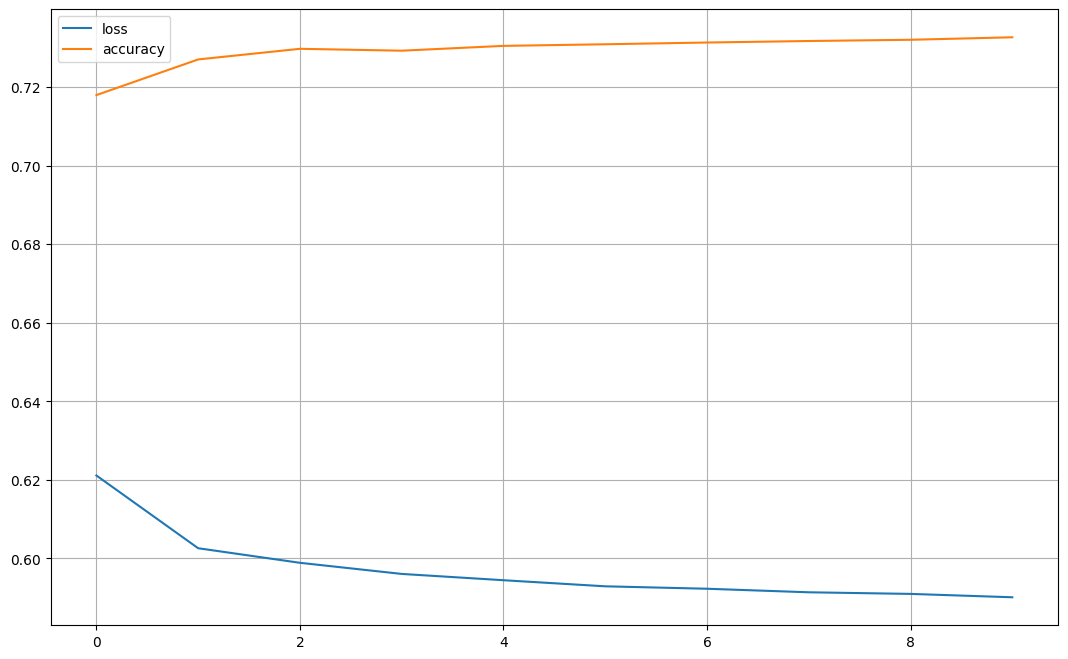

In [43]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

Все примерно одинаковы

In [50]:
#предсказание
y_pred = model.predict(X_test) #по умолчанию predict возвращает вероятность 1 класса

#метки класса
y_classes = y_pred.argmax(axis=-1)
y_classes[:10]

812/812 [==============================] - 4s 5ms/step


array([2, 2, 2, 2, 0, 0, 2, 0, 2, 2])

In [51]:
#декодинг меток в название категорий
le.inverse_transform(y_classes[:10])

array(['Норм пойло', 'Норм пойло', 'Норм пойло', 'Норм пойло',
       'Вери гуд бухлишко', 'Вери гуд бухлишко', 'Норм пойло',
       'Вери гуд бухлишко', 'Норм пойло', 'Норм пойло'], dtype=object)

In [52]:
y_test_old=y_test.argmax(axis=-1)

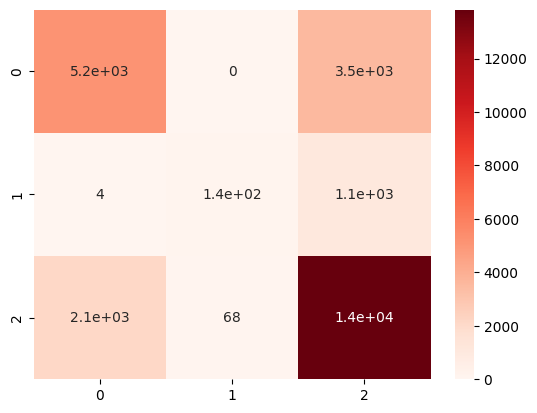

In [53]:
#матрица путаницы
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test_old, y_classes)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

In [54]:
cf_matrix

array([[ 5171,     0,  3539],
       [    4,   137,  1109],
       [ 2124,    68, 13830]])